# Project: Wrangling and Analyze Data

# Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#packages
import pandas as pd
import requests
import os
import json
import numpy as np
import re
import matplotlib.pyplot as plt
from pandas import testing as tm

In [2]:
ta_ratings = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
  file.write(response.content)

images_pred = pd.read_csv('image-predictions.tsv', sep ='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:


# reference:https://www.geeksforgeeks.org/how-to-read-dictionary-from-file-in-python/ 

df_list=[]
with open('tweet_json.txt', 'r') as fh:
    for line in fh:
        tweet = json.loads(line)
        tweet_id =tweet['id_str']
        retweet = tweet['retweet_count']
        favorite = tweet['favorite_count']
        df_list.append({'tweet_id':int(tweet_id),
                        'retweet': retweet,
                        'favorite': favorite})
tweet_rate =pd.DataFrame(df_list, columns =['tweet_id', 'retweet','favorite'])   
    
tweet_rate    

,tweet_id,retweet,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Assessing Data


In [5]:
ta_ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
images_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
tweet_rate

,tweet_id,retweet,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [8]:
ta_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
images_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2354 non-null   int64
 1   retweet   2354 non-null   int64
 2   favorite  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [11]:
ta_ratings.shape

(2356, 17)

In [12]:
images_pred.shape

(2075, 12)

In [13]:
tweet_rate.shape

(2354, 3)

In [14]:
sum(ta_ratings.duplicated())

0

In [15]:
sum(images_pred.duplicated())

0

In [16]:
sum(tweet_rate.duplicated())

0

In [17]:
ta_ratings.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
images_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
tweet_rate.describe()

,tweet_id,retweet,favorite
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [20]:
ta_ratings.rating_numerator.sort_values().value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
images_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Quality issues

**1. Inappropriate Datatypes/ formats**
Columns such `tweet_id`, `timestamp` etc have wrong datatype formats


**2. Unnecassary Columns**
The follwing columns in table `ta_ratings` are not necessary:
`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`



 **3. MIssing Values**

Table `image_pred` is missing some obsevartions.




**4. Invalid names**

Some dog names are invalid ('a','an','the', etc)


**5. Misrepresentation of null values**

null values some columns (`pupper`, `puppo`, `doggo`, `floofer` etc) are misrepresented as 'None'


**6. Incomplete values** 

 The values of the `source` columns are incomplete


**7. Indescriptive column names**

Some column names (`p1`, `p2`, `p3`, etc) are not descriptive


**8. Repeated and unrelated values in columns**

Some values in the `expanded_urls` column of table `ta-ratings` are repeated and others unrelated

### Tidiness issues
1. Dog types in `ta_ratings table` should be merged in one column


2. All three data sets should me merged into one

# Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
ta_ratings_clean = ta_ratings.copy()
images_pred_clean = images_pred.copy()
tweet_rate_clean = tweet_rate.copy()

## Tidiness Issues

### Issue #1:  Merging the Datasets

#### Define: Merge all three tables using the merge function and drop entries without images. 

#### Code

In [23]:
dog_ratings = pd.merge(ta_ratings_clean,tweet_rate_clean,
                       on='tweet_id', how='left')
dog_ratings = pd.merge(dog_ratings, images_pred_clean,
                       on='tweet_id', how='left')

#### Test

In [24]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2:  Merging the columns

#### Define: Merge the columns of the dog stages using the melt function

#### Code

In [25]:
dog_ratings = pd.melt(dog_ratings, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 
                                              'timestamp', 'source', 'text', 'retweeted_status_id', 
                                              'retweeted_status_user_id', 'retweeted_status_timestamp', 
                                              'expanded_urls', 'rating_numerator', 'rating_denominator',
                                              'name', 'retweet', 'favorite', 'jpg_url', 'img_num', 'p1', 'p1_conf', 
                                              'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
                                      value_vars=['doggo','floofer','pupper', 'puppo'], 
                                   var_name= 'dog_stages', value_name ='stage') 

#### Test

In [26]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  retweet                     9416 

## Quality Issues

### Issue #1: Missing values

#### Define: Drop observations that do not have images

#### Code

In [27]:
dog_ratings.dropna(subset=['jpg_url'], inplace=True)
dog_ratings.dropna(subset=['favorite'], inplace=True)

#### Test

In [28]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8292 entries, 0 to 9423
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8292 non-null   int64  
 1   in_reply_to_status_id       92 non-null     float64
 2   in_reply_to_user_id         92 non-null     float64
 3   timestamp                   8292 non-null   object 
 4   source                      8292 non-null   object 
 5   text                        8292 non-null   object 
 6   retweeted_status_id         316 non-null    float64
 7   retweeted_status_user_id    316 non-null    float64
 8   retweeted_status_timestamp  316 non-null    object 
 9   expanded_urls               8292 non-null   object 
 10  rating_numerator            8292 non-null   int64  
 11  rating_denominator          8292 non-null   int64  
 12  name                        8292 non-null   object 
 13  retweet                     8292 

### Issue #2:  Unnecessary columns

#### Define: Dropping unnecessary columns

#### Code

In [29]:
dog_ratings.drop(dog_ratings.columns[[1,2,6,7,8,13]], axis=1, inplace=True)

#### Test

In [30]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8292 entries, 0 to 9423
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            8292 non-null   int64  
 1   timestamp           8292 non-null   object 
 2   source              8292 non-null   object 
 3   text                8292 non-null   object 
 4   expanded_urls       8292 non-null   object 
 5   rating_numerator    8292 non-null   int64  
 6   rating_denominator  8292 non-null   int64  
 7   name                8292 non-null   object 
 8   favorite            8292 non-null   float64
 9   jpg_url             8292 non-null   object 
 10  img_num             8292 non-null   float64
 11  p1                  8292 non-null   object 
 12  p1_conf             8292 non-null   float64
 13  p1_dog              8292 non-null   object 
 14  p2                  8292 non-null   object 
 15  p2_conf             8292 non-null   float64
 16  p2_dog

### Issue #3:  Erroneous Datatypes

#### Define: Convert the timestamp column format to datetime

#### Code

In [31]:
dog_ratings['tweet_id']= dog_ratings['tweet_id'].astype(str)
dog_ratings['timestamp']= pd.to_datetime(dog_ratings['timestamp'])
dog_ratings['rating_numerator']= dog_ratings['rating_numerator'].astype(float)
dog_ratings['rating_denominator']= dog_ratings['rating_denominator'].astype(float)
dog_ratings['favorite']= dog_ratings['favorite'].astype(int)
dog_ratings['dog_stages']= dog_ratings['dog_stages'].astype('category')
dog_ratings['stage']= dog_ratings['stage'].astype('category')

#### Test

In [32]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8292 entries, 0 to 9423
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8292 non-null   object             
 1   timestamp           8292 non-null   datetime64[ns, UTC]
 2   source              8292 non-null   object             
 3   text                8292 non-null   object             
 4   expanded_urls       8292 non-null   object             
 5   rating_numerator    8292 non-null   float64            
 6   rating_denominator  8292 non-null   float64            
 7   name                8292 non-null   object             
 8   favorite            8292 non-null   int64              
 9   jpg_url             8292 non-null   object             
 10  img_num             8292 non-null   float64            
 11  p1                  8292 non-null   object             
 12  p1_conf             8292 non-null 

### Issue #4:  Invalid names

#### Define: Use mask function  and regex to change  invalid names  to 'NaN'

#### Code

In [33]:

#reference: https://stackoverflow.com/questions/63358767/how-to-filter-rows-and-words-in-lower-case-in-pandas-dataframe
#https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none


invalid_names= dog_ratings['name'].str.extractall(r'(\b[a-z]+\b)')[0].tolist()
#print(invalid_names)
dog_ratings['name']=dog_ratings.name.mask(dog_ratings.name.str.match(r'^[a-z\s]+$', na=False))

#### Test

In [34]:
print(list(dog_ratings['name']))

['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax', 'None', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'None', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela', 'None', 'None', 'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'None', 'Earl', 'Lola', 'Kevin', 'None', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'None', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', nan, 'Elliot', 'Louis', 'None', 'Bella', 'Jesse', 'None', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'None', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'None', 'Cash', 'Jed', 'None', 'Sebastian', 'Walter', 'None', 'Sierra', 'None', 'None', 'Monkey', 'None', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'None', 'Cody', 'Zoey', 'Rumble', 'Clifford', 'Dewey', 'Stanley', 'Scout', 'Gizmo', 'Walter', 'None', 'Cooper', 'None', 'Harold', 'Shikha', 'None', 'None', 'L

### Issue #5: Missrepresentation of NaN values 

#### Define: Use replace function  and regex to change 'None' values to 'NaN'

#### Code

In [35]:
# 'None' values to NaN
dog_ratings=dog_ratings.replace('None', np.NaN)

#### Test

In [36]:
dog_ratings

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,NaN
9420,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,NaN
9421,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,NaN
9422,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,NaN


### Issue # 6: Incomplete values

#### Define:  merge tweet_id with source vales to create proper source urls

#### Code

In [37]:
#extract source url
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
dog_ratings['source'] =  dog_ratings["source"].str.extract(pattern, expand=False).str.strip()

In [38]:
dog_ratings['source'] = dog_ratings['source'] + '/' + dog_ratings['tweet_id']

#### Test

In [39]:
dog_ratings['source'][7]

'http://twitter.com/download/iphone/890729181411237888'

In [40]:
# changing the letter cases
dog_ratings.p1 = dog_ratings.p1.str.lower()
dog_ratings.p2 = dog_ratings.p2.str.lower()
dog_ratings.p3 = dog_ratings.p3.str.lower()

### Issue # 7: Indescriptive columns names

#### Define:  Change the names of coulms

#### Code

In [41]:
dog_ratings = dog_ratings.rename({'p1': 'image_prediction_1', 
                                  'p2': 'image_prediction_2', 
                                  'p3': 'image_prediction_3',
                                  'p1_conf': 'conf_image_prediction_1',
                                  'p2_conf': 'conf_image_prediction_2',
                                  'p3_conf': 'conf_image_prediction_3',
                                  'p1_dog': 'acc_image_prediction_1',
                                  'p2_dog': 'acc_image_prediction_2',
                                  'p3_dog': 'acc_image_prediction_3'}, axis=1)

#### Test

In [42]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8292 entries, 0 to 9423
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 8292 non-null   object             
 1   timestamp                8292 non-null   datetime64[ns, UTC]
 2   source                   8292 non-null   object             
 3   text                     8292 non-null   object             
 4   expanded_urls            8292 non-null   object             
 5   rating_numerator         8292 non-null   float64            
 6   rating_denominator       8292 non-null   float64            
 7   name                     5584 non-null   object             
 8   favorite                 8292 non-null   int64              
 9   jpg_url                  8292 non-null   object             
 10  img_num                  8292 non-null   float64            
 11  image_prediction_1       8292 

### Issue # 8: Repeated and unrelated values in columns

#### Define: remove unretaled urls and repeated urls from expanded url column

#### Code

In [43]:
#remove repeted url
dog_ratings[['expanded_urls', 'others']]= dog_ratings['expanded_urls'].str.split(',', n=1, expand=True)

In [44]:
#remove unrelated url
url = r'https://twitter.com/dog_rates/status/?'

dog_ratings = dog_ratings[dog_ratings['expanded_urls'].str.contains(url)]

In [45]:
dog_ratings=dog_ratings.reset_index(drop=True)

#### Test

In [46]:
dog_ratings['expanded_urls'][6]

'https://twitter.com/dog_rates/status/890729181411237888/photo/1'

In [47]:
dog_ratings

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite,jpg_url,...,acc_image_prediction_1,image_prediction_2,conf_image_prediction_2,acc_image_prediction_2,image_prediction_3,conf_image_prediction_3,acc_image_prediction_3,dog_stages,stage,others
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone/89242064355...,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,doggo,NaN,None
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone/89217742130...,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,pekinese,0.090647,True,papillon,0.068957,True,doggo,NaN,None
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone/89181518137...,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,NaN,None
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone/89168955727...,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,NaN,None
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone/89132755892...,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,doggo,NaN,https://twitter.com/dog_rates/status/891327558...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone/66604924816...,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,True,rottweiler,0.243682,True,doberman,0.154629,True,puppo,NaN,None
8120,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone/66604422632...,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,NaN,None
8121,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone/66603341270...,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,NaN,None
8122,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone/66602928500...,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,puppo,NaN,None


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
dog_ratings.to_csv('twitter_archive_master.csv')

cleaned_df = pd.read_csv('twitter_archive_master.csv')
cleaned_df =cleaned_df.drop(columns=['Unnamed: 0'])

In [49]:
cleaned_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite,jpg_url,...,acc_image_prediction_1,image_prediction_2,conf_image_prediction_2,acc_image_prediction_2,image_prediction_3,conf_image_prediction_3,acc_image_prediction_3,dog_stages,stage,others
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone/89242064355...,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,doggo,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone/89217742130...,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,pekinese,0.090647,True,papillon,0.068957,True,doggo,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone/89181518137...,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone/89168955727...,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone/89132755892...,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,doggo,NaN,https://twitter.com/dog_rates/status/891327558...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone/66604924816...,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,True,rottweiler,0.243682,True,doberman,0.154629,True,puppo,NaN,NaN
8120,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone/66604422632...,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,NaN,NaN
8121,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone/66603341270...,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,NaN,NaN
8122,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone/66602928500...,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,puppo,NaN,NaN


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [50]:
cleaned_df.groupby('rating_numerator').count()

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,name,favorite,jpg_url,img_num,...,acc_image_prediction_1,image_prediction_2,conf_image_prediction_2,acc_image_prediction_2,image_prediction_3,conf_image_prediction_3,acc_image_prediction_3,dog_stages,stage,others
rating_numerator,,,,,,,,,,,,,,,,,,,,,
0.0,8,8,8,8,8,8,0,8,8,8,...,8,8,8,8,8,8,8,8,0,4
1.0,20,20,20,20,20,20,0,20,20,20,...,20,20,20,20,20,20,20,20,0,0
2.0,36,36,36,36,36,36,12,36,36,36,...,36,36,36,36,36,36,36,36,0,0
3.0,76,76,76,76,76,76,40,76,76,76,...,76,76,76,76,76,76,76,76,1,8
4.0,64,64,64,64,64,64,20,64,64,64,...,64,64,64,64,64,64,64,64,0,0
5.0,132,132,132,132,132,132,56,132,132,132,...,132,132,132,132,132,132,132,132,3,8
6.0,128,128,128,128,128,128,68,128,128,128,...,128,128,128,128,128,128,128,128,1,8
7.0,208,208,208,208,208,208,132,208,208,208,...,208,208,208,208,208,208,208,208,8,4
8.0,380,380,380,380,380,380,280,380,380,380,...,380,380,380,380,380,380,380,380,15,36


In [51]:
cleaned_df.acc_image_prediction_1.value_counts()

True     6016
False    2108
Name: acc_image_prediction_1, dtype: int64

In [53]:
cleaned_df.acc_image_prediction_2.value_counts()

True     6088
False    2036
Name: acc_image_prediction_2, dtype: int64

In [54]:
cleaned_df.acc_image_prediction_3.value_counts()

True     5880
False    2244
Name: acc_image_prediction_3, dtype: int64

In [55]:
cleaned_df.stage.value_counts()

pupper     217
doggo       77
puppo       22
floofer      8
Name: stage, dtype: int64

### Insights:

1. 2 or more dogs have their ratings between 0 to 14, with a majority between 9 to 13. Ratings above 14 have one    dog per rating.


2. Most of the dogs do not fall in any of the dog stages, However of the ones that do, majority are at the `pupper` stage


3. Comparatively, the image predictions of p2 had more true values that p1 and p3

### Visualization

In [56]:
cleaned_df.drop(cleaned_df[cleaned_df.rating_numerator > 14].index, inplace=True)

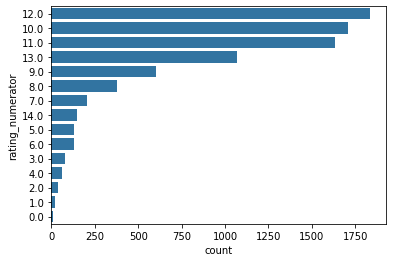

In [57]:
#visualizing  the ratings with the most counts
import seaborn as sb
base_color=sb.color_palette()[0]
rate_order =cleaned_df.rating_numerator.value_counts().index
sb.countplot(data=cleaned_df, y='rating_numerator', color = base_color, order = rate_order);

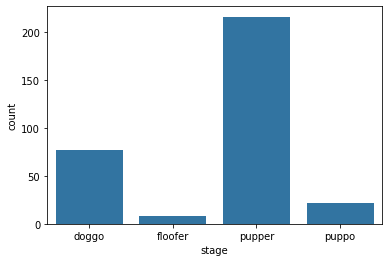

In [58]:
#visualizing  the stage with the most counts
import seaborn as sb
base_color=sb.color_palette()[0]

sb.countplot(data=cleaned_df, x='stage', color = base_color);

In [59]:
cleaned_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite,jpg_url,...,acc_image_prediction_1,image_prediction_2,conf_image_prediction_2,acc_image_prediction_2,image_prediction_3,conf_image_prediction_3,acc_image_prediction_3,dog_stages,stage,others
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone/89242064355...,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,doggo,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone/89217742130...,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,pekinese,0.090647,True,papillon,0.068957,True,doggo,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone/89181518137...,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone/89168955727...,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone/89132755892...,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,doggo,NaN,https://twitter.com/dog_rates/status/891327558...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,666049248165822465,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone/66604924816...,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,True,rottweiler,0.243682,True,doberman,0.154629,True,puppo,NaN,NaN
8120,666044226329800704,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone/66604422632...,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,NaN,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,NaN,NaN
8121,666033412701032449,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone/66603341270...,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,NaN,NaN
8122,666029285002620928,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone/66602928500...,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,puppo,NaN,NaN


In [63]:
cleaned_df.groupby(['rating_numerator','stage']).count()

tweet_id  timestamp  source  text  expanded_urls  \
rating_numerator stage                                                       
3.0              pupper          1          1       1     1              1   
5.0              doggo           1          1       1     1              1   
                 pupper          2          2       2     2              2   
6.0              pupper          1          1       1     1              1   
7.0              pupper          8          8       8     8              8   
8.0              doggo           3          3       3     3              3   
                 pupper         12         12      12    12             12   
9.0              pupper         16         16      16    16             16   
                 puppo           1          1       1     1              1   
10.0             doggo           7          7       7     7              7   
                 floofer         1          1       1     1              1   
                 pupper         48         48      48    48             48   
                 puppo           3          3       3     3              3   
11.0             doggo          18         18      18    18             18   
                 floofer         2          2       2     2              2   
                 pupper         53         53      53    53             53   
                 puppo           2          2       2     2              2   
12.0             doggo          19         19      19    19             19   
                 floofer         2          2       2     2              2   
                 pupper         53         53      53    53             53   
                 puppo           6          6       6     6              6   
13.0             doggo          20         20      20    20             20   
                 floofer         3          3       3     3              3   
                 pupper         15         15      15    15             15   
                 puppo           9          9       9     9              9   
14.0             doggo           9          9       9     9              9   
                 pupper          7          7       7     7              7   
                 puppo           1          1       1     1              1   

                          rating_denominator  name  favorite  jpg_url  \
rating_numerator stage                                                  
3.0              pupper                    1     1         1        1   
5.0              doggo                     1     0         1        1   
                 pupper                    2     0         2        2   
6.0              pupper                    1     1         1        1   
7.0              pupper                    8     6         8        8   
8.0              doggo                     3     2         3        3   
                 pupper                   12     8        12       12   
9.0              pupper                   16    13        16       16   
                 puppo                     1     1         1        1   
10.0             doggo                     7     2         7        7   
                 floofer                   1     1         1        1   
                 pupper                   48    32        48       48   
                 puppo                     3     2         3        3   
11.0             doggo                    18     8        18       18   
                 floofer                   2     1         2        2   
                 pupper                   53    35        53       53   
                 puppo                     2     1         2        2   
12.0             doggo                    19    12        19       19   
                 floofer                   2     2         2        2   
                 pupper                   53    18        53       53   
                 puppo                     6     6         6        6   
13.0  

In [68]:
cleaned_df.groupby('stage')['favorite'].mean()

stage
doggo      17789.272727
floofer    13701.375000
pupper      7218.296296
puppo      23168.318182
Name: favorite, dtype: float64